<a href="https://colab.research.google.com/github/Aartizikre150/DAB-303/blob/main/P_3_Customer_Behavior_Analysis_%5BSolution%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-commerce data EDA for Customer Behavior Analysis

EDA (Exploratory Data Analysis) of E-Commerce data will help us understand the data and think of ways to use it to understand the customer behavior.

## 1. Load libraries

In [ ]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.3/114.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.6/27.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 9.0.0
    Uninstalling pyarrow-9.0.0:
      Successfully uninstalled pyarrow-9.0

In [ ]:
import pandas as pd
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Load Data

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/DAB303/Project3/Customer_Behavior_Data.csv', delimiter=';')
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


In [ ]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3333   │ │ int64       │ 14    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA ┃ NA % ┃ mean    ┃ sd     ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ account length   │  0 │    0 │     100 │     40 │       1 │      74 │     100 │     130 │     240 │ ▁▅▇▅▁  │  │
│ │ location code    │  0 │    0 │     440 │     42 │     410 │     410 │     420 │     510 │     510 │ ▇    ▃ │  │
│ │ user id          │  0 │    0 │ 3700000 │ 270000 │ 3300000 │ 3500000 │ 3700000 │ 4000000 │ 4200000 │ ▇▇▇▇▇▇ │  │
│ │ add to wishlist  │  0 │    0 │     8.1 │     14 │       0 │       0 │       0 │      20 │      51 │ ▇ ▁▁▁  │  │
│ │ desktop sessions │  0 │    0 │     180 │     54 │       0 │     140 │     180 │     220 │     350 │  ▂▇▇▃  │  │
│ │ app sessions     │  0 │    0 │      31 │    9.3 │       0 │      24 │      31 │      37 │      60 │  ▂▇▇▃  │  │
│ │ desktop          │  0 │    0 │      17 │    4.3 │       0 │      14 │      17 │      20 │      31 │  ▁▆▇▃  │  │
│ │ transactions     │    │      │         │        │         │         │         │         │         │        │  │
│ │ total product    │  0 │    0 │     100 │     20 │       0 │      87 │     100 │     110 │     160 │   ▃▇▅▁ │  │
│ │ detail views     │    │      │         │        │         │         │         │         │         │        │  │
│ │ session duration │  0 │    0 │     200 │     51 │       0 │     170 │     200 │     240 │     360 │  ▁▅▇▃  │  │
│ │ promotion clicks │  0 │    0 │     100 │     20 │       0 │      87 │     100 │     110 │     170 │   ▃▇▃  │  │
│ │ sale product     │  0 │    0 │     100 │     20 │      33 │      87 │     100 │     110 │     180 │  ▃▇▇▂  │  │
│ │ views            │    │      │         │        │         │         │         │         │         │        │  │
│ │ app transactions │  0 │    0 │     4.5 │    2.5 │       0 │       3 │       4 │       6 │      20 │  ▇▇▂▁  │  │
│ │ customer service │  0 │    0 │     1.6 │    1.3 │       0 │       1 │       1 │       2 │       9 │  ▇▃▃   │  │
│ │ calls            │    │      │         │        │         │         │         │         │         │        │  │
│ │ churn            │  0 │    0 │    0.14 │   0.35 │       0 │       0 │       0 │       0 │       1 │ ▇    ▁ │  │
│ └──────────────────┴────┴──────┴─────────┴────────┴─────────┴─────────┴─────────┴─────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━

## EDA

With every new dataset we need to got throuhg an EDA (Exploratory Data Analysis) process. It's a good idea to have a basic framework in mind for our EDAs. It is always a good idea to:

- Understand what our columns say
- Rename columns labels and make them lowercase
- Make sure that the data types of columns are correct
- Handle missing values
- Check for duplicates
- Search for outliers
- Check for linearity between variables

To achieve this we can take advantage of Pandas and visualisation libraries

**Rename columns labels and make them lowercase**

In [ ]:
# Rename the columns
df.rename(columns={
    'account length': 'acct_length',
    'location code': 'loc_code',
    'user id': 'user_id',
    'credit card info save': 'cc_info_save',
    'push status': 'push_status',
    'add to wishlist': 'wishlist',
    'desktop sessions': 'desktop_sessions',
    'app sessions': 'app_sessions',
    'desktop transactions': 'desktop_transactions',
    'total product detail views': 'prod_detail_views',
    'session duration': 'session_duration',
    'promotion clicks': 'promo_clicks',
    'avg order value': 'avg_order_value',
    'sale product views': 'sale_prod_views',
    'discount rate per visited products': 'discount_rate_per_visited',
    'product detail view per app session': 'prod_detail_view_per_app',
    'app transactions': 'app_transactions',
    'add to cart per session': 'add_to_cart_per_session',
    'customer service cal': 'customer_service_cal'
}, inplace=True)
df.head()

,acct_length,loc_code,user_id,cc_info_save,push_status,wishlist,desktop_sessions,app_sessions,desktop_transactions,prod_detail_views,session_duration,promo_clicks,avg_order_value,sale_prod_views,discount_rate_per_visited,prod_detail_view_per_app,app_transactions,add_to_cart_per_session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110,197,87,"244,7",91,"11,01",10,3,"2,7",1,0
1,107,415,3717191,no,yes,26,162,27,17,123,196,103,"254,4",103,"11,45","13,7",3,"3,7",1,0
2,137,415,3581921,no,no,0,243,41,10,114,121,110,"162,6",104,"7,32","12,2",5,"3,29",0,0
3,84,408,3759999,yes,no,0,299,51,5,71,62,88,"196,9",89,"8,86","6,6",7,"1,78",2,0
4,75,415,3306626,yes,no,0,167,28,13,113,148,122,"186,9",121,"8,41","10,1",3,"2,73",3,0


**Make sure that the data types of columns are correct**

In [ ]:
# check the column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   acct_length                3333 non-null   int64 
 1   loc_code                   3333 non-null   int64 
 2   user_id                    3333 non-null   int64 
 3   cc_info_save               3333 non-null   object
 4   push_status                3333 non-null   object
 5   wishlist                   3333 non-null   int64 
 6   desktop_sessions           3333 non-null   int64 
 7   app_sessions               3333 non-null   int64 
 8   desktop_transactions       3333 non-null   int64 
 9   prod_detail_views          3333 non-null   int64 
 10  session_duration           3333 non-null   int64 
 11  promo_clicks               3333 non-null   int64 
 12  avg_order_value            3333 non-null   object
 13  sale_prod_views            3333 non-null   int64 
 14  discount

In [ ]:
# change the data-type of the 4 columns to float
df['avg_order_value'] = df['avg_order_value'].replace(',','.', regex=True).astype(float)
df['discount_rate_per_visited'] = df['discount_rate_per_visited'].replace(',','.', regex=True).astype(float)
df['add_to_cart_per_session'] = df['add_to_cart_per_session'].replace(',','.', regex=True).astype(float)
df['prod_detail_view_per_app'] = df['prod_detail_view_per_app'].replace(',','.', regex=True).astype(float)

# Use the replace method to convert values
df['churn'] = df['churn'].replace({1: 'Yes', 0 : 'No'}).astype(object)

df['loc_code'] = df['loc_code'].astype(object)

df.dtypes

acct_length                    int64
loc_code                      object
user_id                        int64
cc_info_save                  object
push_status                   object
wishlist                       int64
desktop_sessions               int64
app_sessions                   int64
desktop_transactions           int64
prod_detail_views              int64
session_duration               int64
promo_clicks                   int64
avg_order_value              float64
sale_prod_views                int64
discount_rate_per_visited    float64
prod_detail_view_per_app     float64
app_transactions               int64
add_to_cart_per_session      float64
customer service calls         int64
churn                         object
dtype: object

## Statistical Analysis

Are there missing values in the data? (see .info() results) so we can move on and check our descriptive statistics with the .describe() function.

In [ ]:
# check the missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acct_length                3333 non-null   int64  
 1   loc_code                   3333 non-null   object 
 2   user_id                    3333 non-null   int64  
 3   cc_info_save               3333 non-null   object 
 4   push_status                3333 non-null   object 
 5   wishlist                   3333 non-null   int64  
 6   desktop_sessions           3333 non-null   int64  
 7   app_sessions               3333 non-null   int64  
 8   desktop_transactions       3333 non-null   int64  
 9   prod_detail_views          3333 non-null   int64  
 10  session_duration           3333 non-null   int64  
 11  promo_clicks               3333 non-null   int64  
 12  avg_order_value            3333 non-null   float64
 13  sale_prod_views            3333 non-null   int64

The quality of the dataset is so good it don't have any null or missing value.

## 3. Check for duplicates

Another common issue with data is duplicated records. We need to make sure to always check for duplicates

In [ ]:
# Check for duplicates
df.duplicated().value_counts()

False    3333
Name: count, dtype: int64

After executing the duplicated() function on this dataset, we can confidently conclude that each record in the dataset is unique. This dataset contains a total of 3333 records, and the function has identified 3333 of them as "false" for duplicated records, meaning there are no duplicate records within the dataset. This assurance is essential when working with data to ensure the accuracy and integrity of your analyses and results.

## 4. Search for outliers

- Outliers are data points at the extreme points of a dataset.
- Some outliers represent true values from natural variation in the population and some occur because of dirty or incorect data.
    - Because of this, we need to be careful when we cleanse our data
    - If the outliers are True outliers, we should probably keep them in our data since they represent natural variations in our sample
    - If the outliers are errors we should generally remove those data points
    
We've already identified some potential outliers from our .describe() function with session durations, average order value, promotion clicks, sale product views, app transactions, account length, add to wish list, desktop sessions, and customer service calls.

To identify our outliers we can use:
- Visualisations such as histograms and blox plots
- Use interquartiles with rules such as:
    - outlier < Q1 - 1.5(IQR)
    - outlier > Q3 + 1.5(IQR)

In [ ]:
df.describe()

,acct_length,user_id,wishlist,desktop_sessions,app_sessions,desktop_transactions,prod_detail_views,session_duration,promo_clicks,avg_order_value,sale_prod_views,discount_rate_per_visited,prod_detail_view_per_app,app_transactions,add_to_cart_per_session,customer service calls
count,3333.000000,3.333000e+03,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,3.746291e+06,8.099010,179.811881,30.567957,17.087609,100.435644,201.039604,100.110711,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,2.746626e+05,13.688365,54.457135,9.269376,4.323795,20.069084,50.714359,19.923911,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,3.271058e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,3.508680e+06,0.000000,144.000000,24.000000,14.000000,87.000000,167.000000,87.000000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,3.748187e+06,0.000000,179.000000,31.000000,17.000000,101.000000,201.000000,100.000000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,3.985970e+06,20.000000,216.000000,37.000000,20.000000,114.000000,235.000000,114.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,4.229964e+06,51.000000,351.000000,60.000000,31.000000,165.000000,364.000000,170.000000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 5. Repeat with the rest of the variables

This is EDA, so we are going to visualize all the variables we identified as having potentail outliers

<ipython-input-12-e4ebedb211c0>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v, i, f' {v} ({percentage[i]:.0f}%)', color='black', va='center')


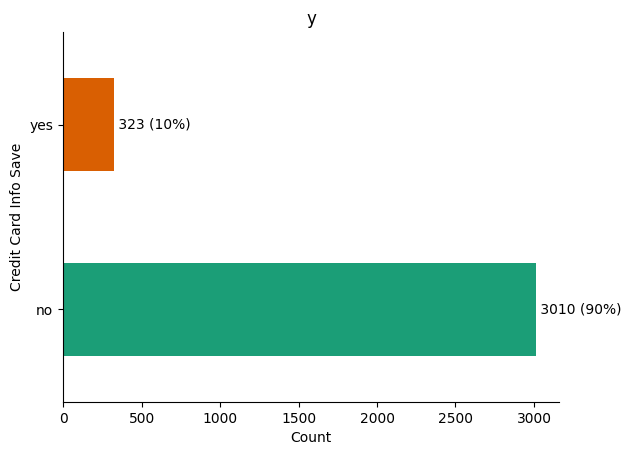

In [ ]:
# Group by 'cc_info_save' and calculate the percentage
cc_info_save_counts = df['cc_info_save'].value_counts()
percentage = cc_info_save_counts / len(df) * 100

# Create the horizontal bar plot
ax = df['cc_info_save'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))

# Annotate the percentages on the bars
for i, v in enumerate(cc_info_save_counts):
    ax.text(v, i, f' {v} ({percentage[i]:.0f}%)', color='black', va='center')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Credit Card Info Save')
plt.title('y')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

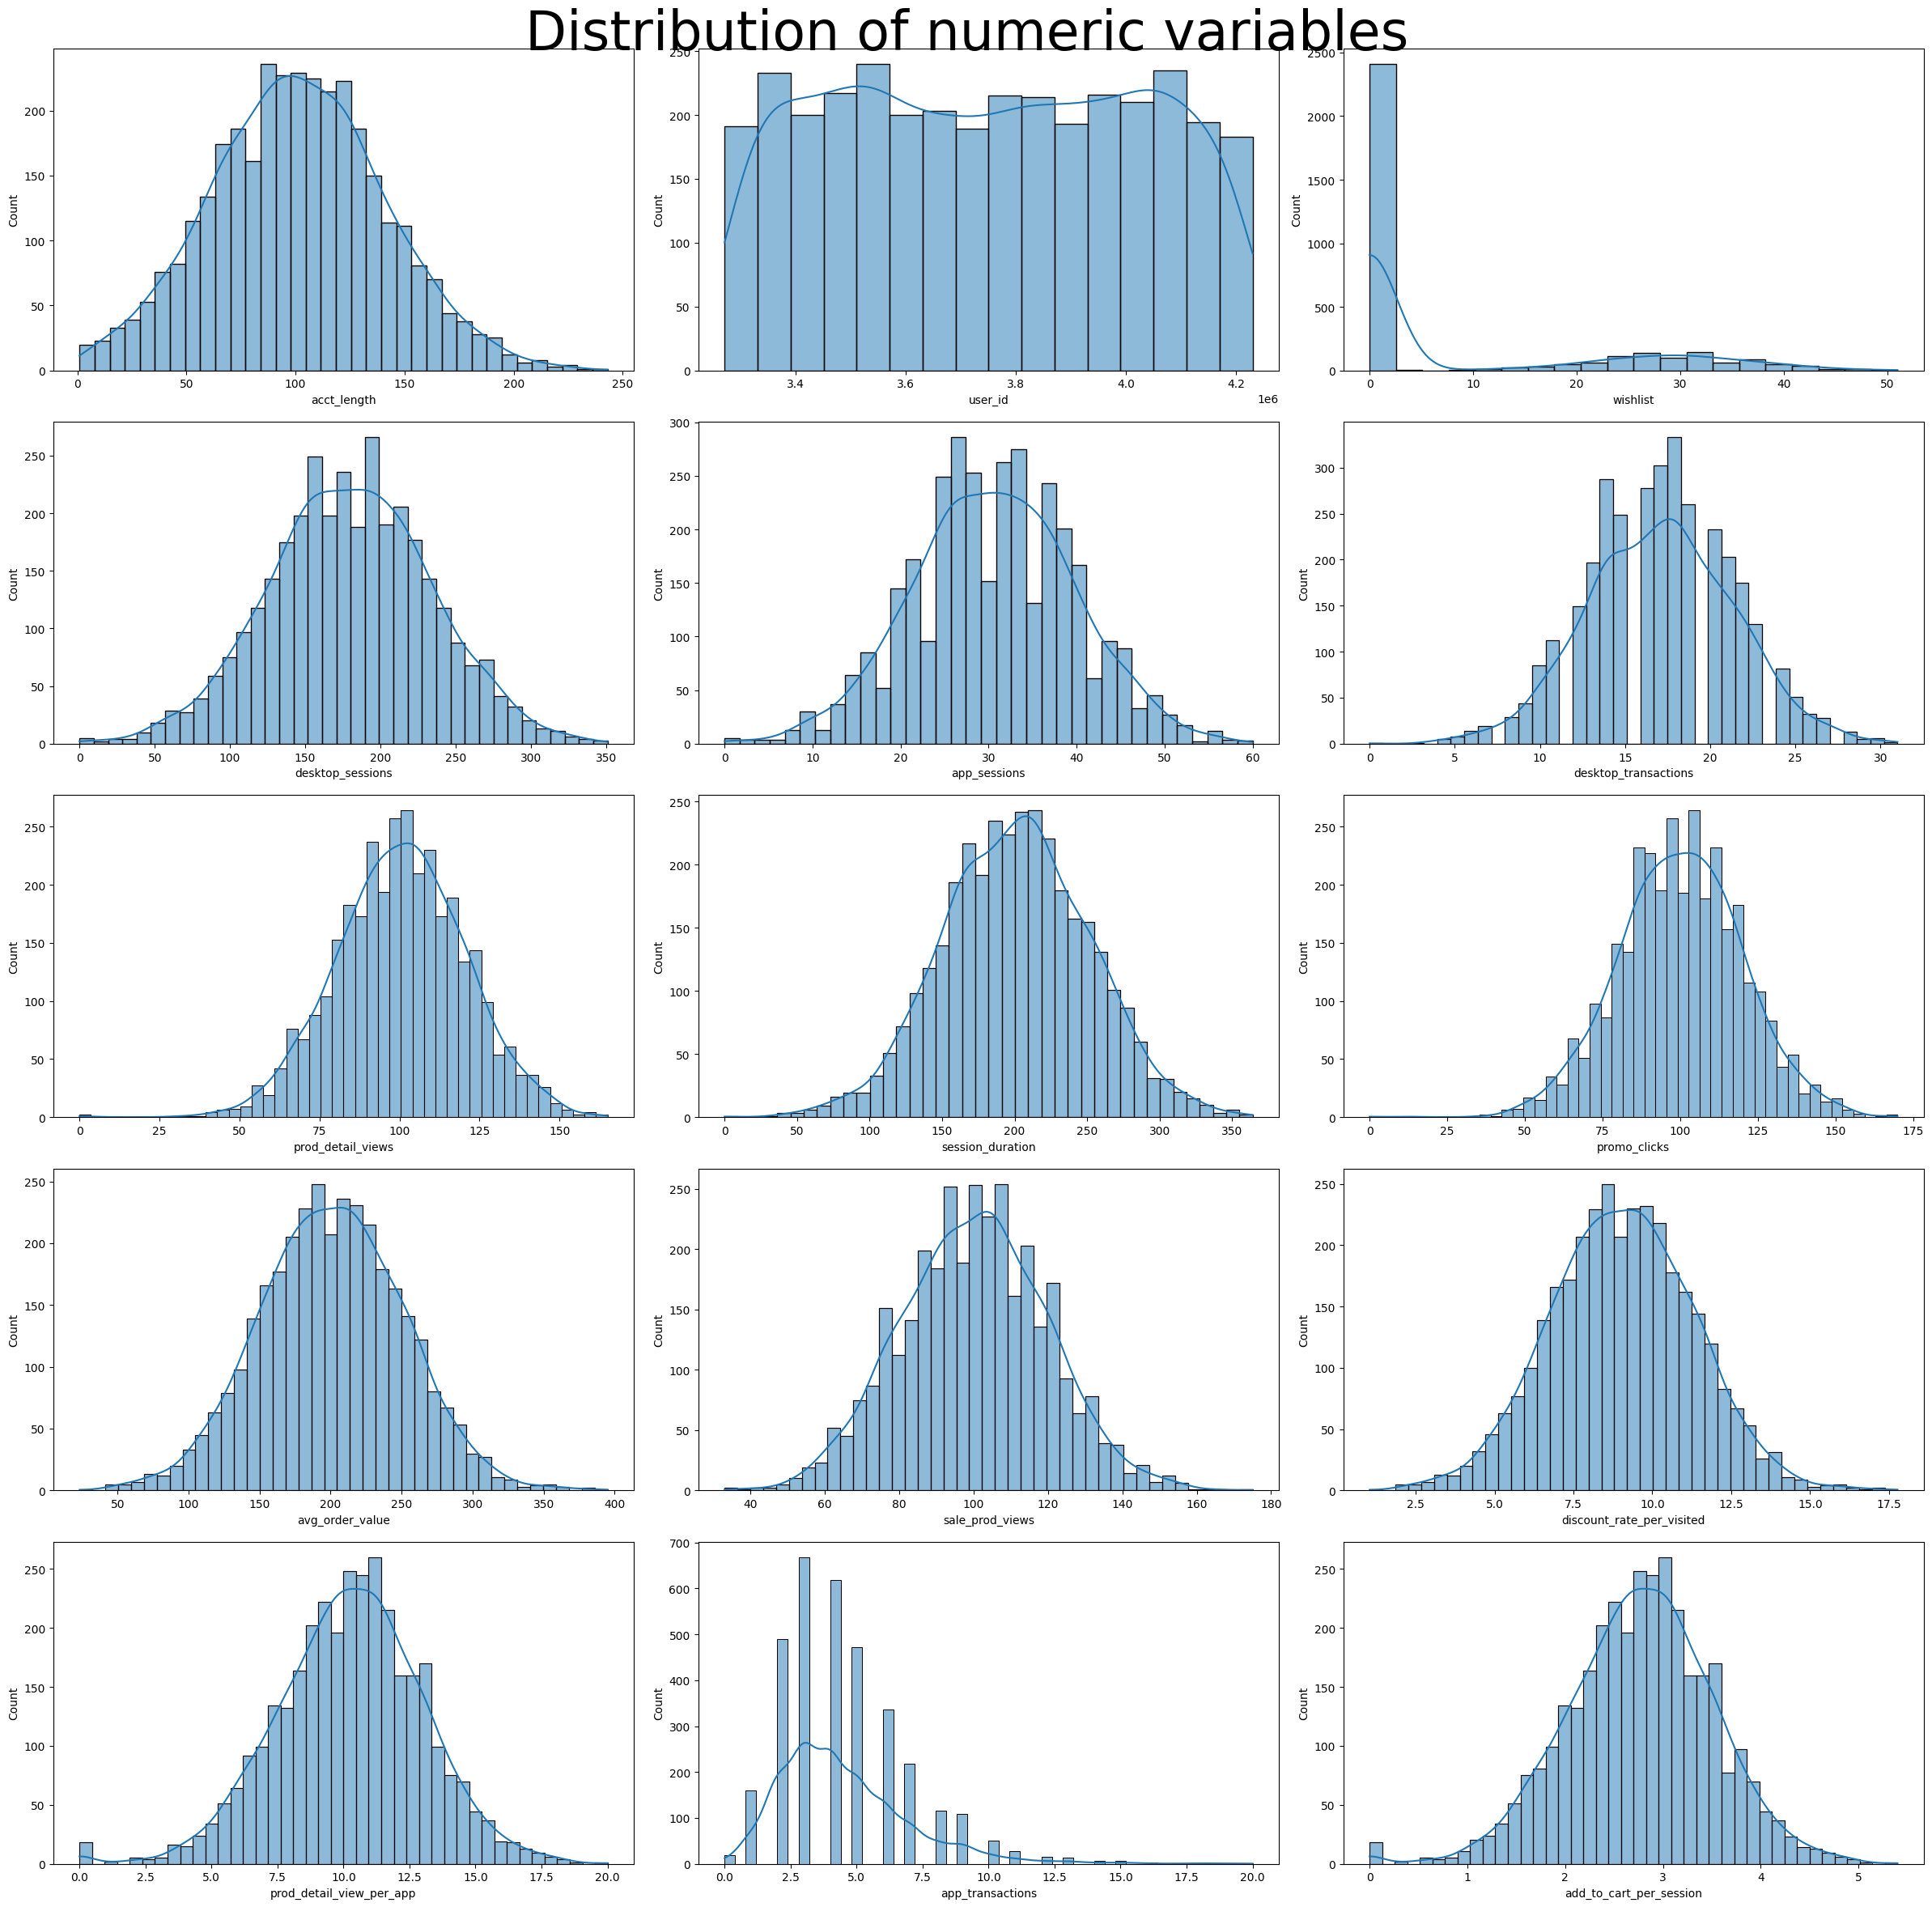

In [ ]:
# Select the numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of rows and columns based on the number of numeric columns
num_rows, num_cols = 5, 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 24))
fig.suptitle("Distribution of numeric variables", size=48)

# Create histograms for numeric variables using Seaborn
for i in range(num_rows):
    for j in range(num_cols):
        index = i * num_cols + j
        if index < len(numeric_columns.columns):
            sns.histplot(df[numeric_columns.columns[index]], ax=axes[i, j], kde=True)
        else:
            axes[i, j].axis('off')  # Disable empty subplots

plt.tight_layout()
plt.show()


# 6. Conclusions based on visualisations

In our study of online shopping data, we found some unusual data points that turned out to be pretty normal. So, we didn't ignore them in our research. By looking at some charts, we figured out a few things:



1.   Most people don't put stuff on their wish lists when they shop online, which means they usually want to buy things right away.
2.   People who use computers to shop visit the website more often and buy more things.
3.   Many shoppers read all the info about products, so businesses should make that info really good and interesting.
4.   People who use the mobile app check out fewer product details and usually add two to four things to their cart in one go.
5.   On average, people stay on the website for about three minutes each time they visit.


# 7. Analysis of the Dependent variable (Churn) vs Idependent variables

Until now we've looked into the numeric variables, their missing data, duplicates, distribution, and outliers. A key part of the customer behaviour data is to understand which "behaviours" aka idependent varialbes in our dataset can help us predict customers deciding to stop using the product, aka "churn".

Another variable that we haven't analysed yet is the location code, but we might be able to find value in comparing it with the churn and finding out any potential correlations.

<ipython-input-14-02a04bf46b12>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(v, i, f' {v} ({percentage[i]:.0f}%)', color='black', va='center')


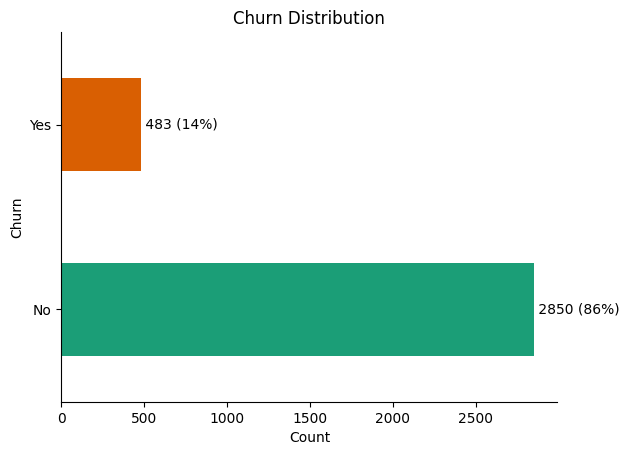

In [ ]:
# Group by 'churn' and calculate the percentage
churn_counts = df['churn'].value_counts()
percentage = churn_counts / len(df) * 100

# Create the horizontal bar plot
ax = df['churn'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))

# Annotate the percentages on the bars
for i, v in enumerate(churn_counts):
    ax.text(v, i, f' {v} ({percentage[i]:.0f}%)', color='black', va='center')

# Customize the plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Count')
plt.ylabel('Churn')
plt.title('Churn Distribution')
plt.show()



The fact that most customers do not leave is good for the business, even though the churn rate could be lower than 15%.

## 8. Plot Churn against the categorical data

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


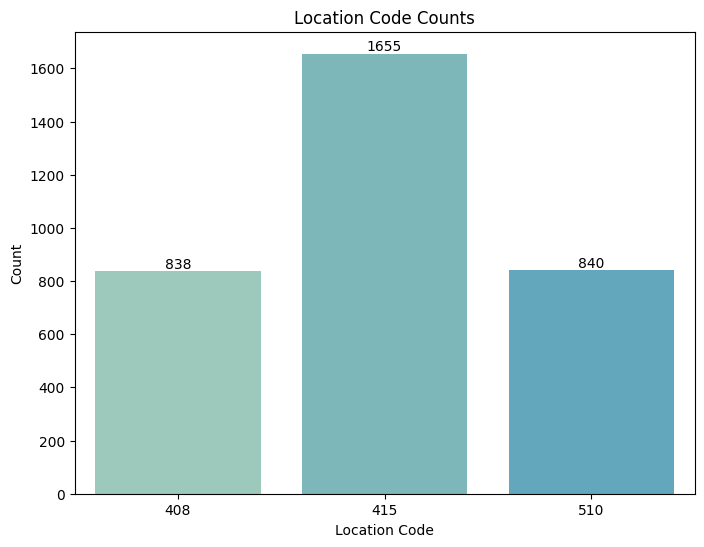

In [ ]:
# Count the occurrences of each 'loc_code'
counts = df['loc_code'].value_counts()

# Sort the counts in ascending order
sorted_counts = counts.sort_values(ascending=True)

# Create a bar chart with sorted x-axis labels
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=sorted_counts.index, y=sorted_counts.values, palette=sns.color_palette('GnBu_d'))

# Annotate the count values (integers) on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Location Code')
plt.ylabel('Count')
plt.title('Location Code Counts')

plt.show()


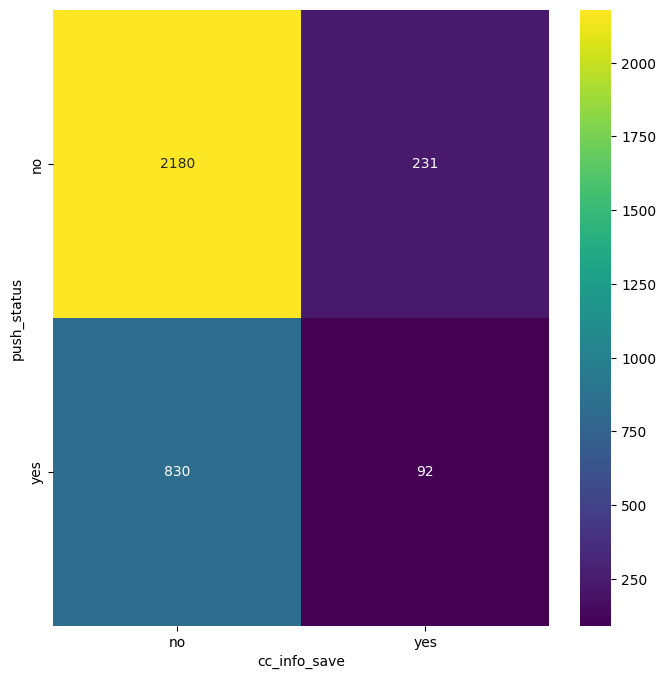

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['push_status'].value_counts()
    for x_label, grp in df.groupby('cc_info_save')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')  # 'd' for integer formatting
plt.xlabel('cc_info_save')
_ = plt.ylabel('push_status')

# 8.1 Observations from the categorical columns plots

- Majority of customers are in location code 415. Customers in different locations (loc_code) have different numbers, which could mean there are variations in how well the business is doing in those areas or in the types of customers they attract.
- Majority of customers don't allow push notifications
- Majority of customers don't store their credit card information on the side
- Customers who decide not to get push notifications ("push_status" = "no") tend to be less likely to save their credit card info ("cc_info_save" = "no"). This suggests they might not be very interested in some features of the service.
- Most of the customers who choose to get push notifications ("push_status" = "yes") stay with the service ("churn" = "No"), but there is a smaller group who do leave ("churn" = "Yes"). Understanding these connections can help you come up with plans to keep customers engaged and make sure they stick around, especially for those who get push notifications.

# 8.2 Plot categorical data against the Churn

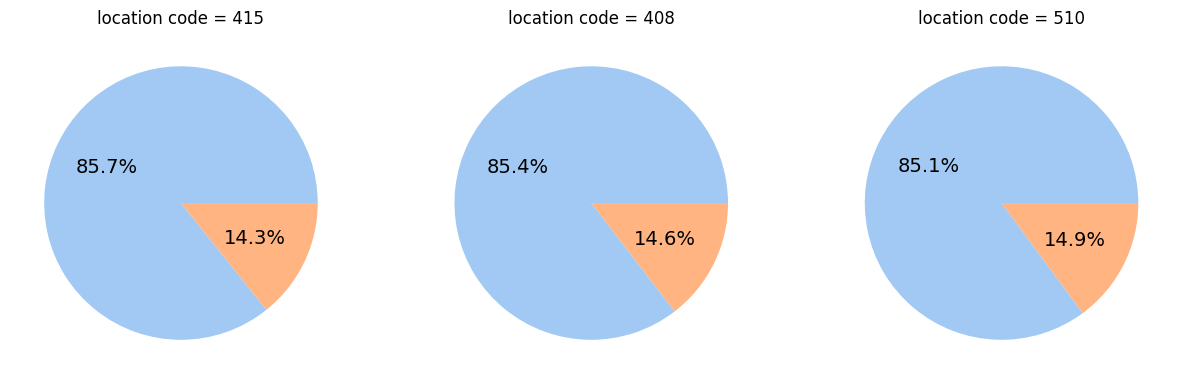

In [ ]:
from matplotlib.gridspec import GridSpec

# Define the pastel color palette
pastel_colors = sns.color_palette("pastel")

plt.figure(1, figsize=(15, 5))  # Adjust the figsize as needed
the_grid = GridSpec(1, 3)

# Plot pie chart for 'location code = 415'
plt.subplot(the_grid[0, 0], aspect=1, title='location code = 415')
source_pie = plt.pie(df[df['loc_code'] == 415]['churn'].value_counts(),
                     colors=pastel_colors, autopct='%.1f%%', textprops={'fontsize': 14})

# Plot pie chart for 'location code = 408'
plt.subplot(the_grid[0, 1], aspect=1, title='location code = 408')
source_pie = plt.pie(df[df['loc_code'] == 408]['churn'].value_counts(),
                     colors=pastel_colors, autopct='%.1f%%', textprops={'fontsize': 14})

# Plot pie chart for 'location code = 510'
plt.subplot(the_grid[0, 2], aspect=1, title='location code = 510')
source_pie = plt.pie(df[df['loc_code'] == 510]['churn'].value_counts(),
                     colors=pastel_colors, autopct='%.1f%%', textprops={'fontsize': 14})

plt.show()


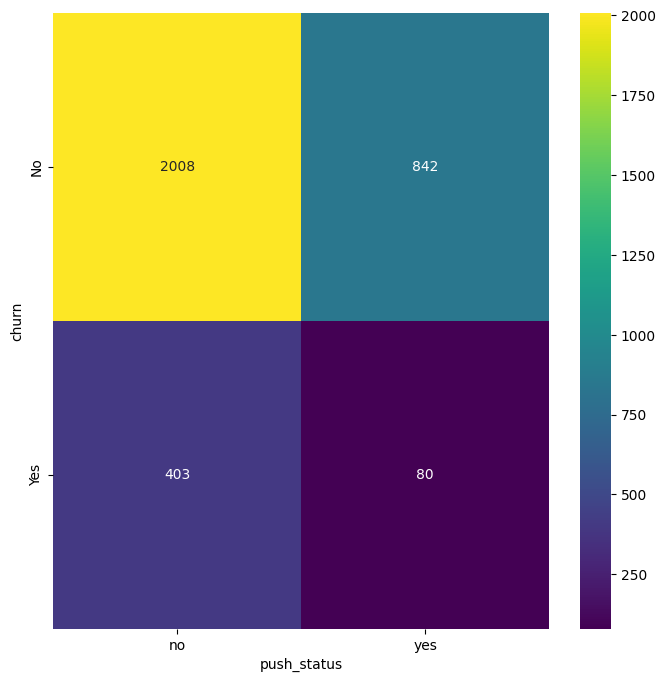

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['churn'].value_counts()
    for x_label, grp in df.groupby('push_status')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')  # 'd' for integer formatting
plt.xlabel('push_status')
_ = plt.ylabel('churn')

,no,yes
churn,,
No,2664,186
Yes,346,137


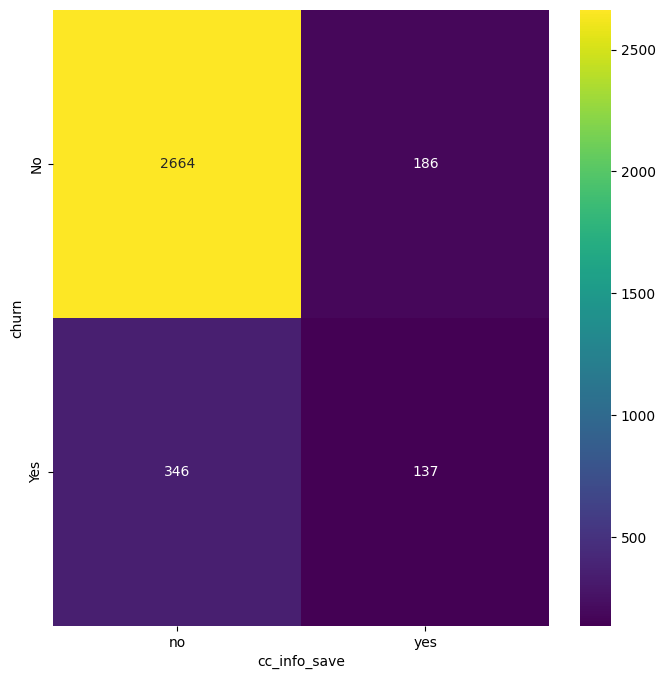

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['churn'].value_counts()
    for x_label, grp in df.groupby('cc_info_save')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')  # 'd' for integer formatting
plt.xlabel('cc_info_save')
_ = plt.ylabel('churn')

# 8.3 Observations from plotting categorical data against Churn

- The location codes have a similar percentage of churns, meaning that location might not be a strong indication for churn
- Customers with push status activated are less likely to be churns, meaning that motivating customers to activate push status might help minimize churns
- Customers with their credit card information saved on the side are far less likely to be churns than customers without their credit card info saved. This means that if the shop motivates people to save their credit card info might minimize churns.
    - This makes sense since customers who trust their credit card info on a side indicate that they trust the brand. More trust less chances of customers leaving your business.